# Part 1: Python Basics - Code Time Value of Money and Capital Budgeting 

## Advanced TVM and Capital Budgeting with Numpy Financial Functions

__NEW: You need to download and install the package numpy-financial first with the command:__

pip install numpy-financial

__NEW: You can then import numpy-financial with the code:__

In [3]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy_financial as npf

__NEW__:

np.npv,  np.irr,  np.fv,  np.pmt,  np.nper,  np.pv,  np.ppmt,   np.ipmt __turned into__ <br>
npf.npv, npf.irr, npf.fv, npf.pmt, npf.nper, npf.pv, npf.ppmt,  npf.ipmt !!!

### Evaluating Investments with npf.npv() and npf.irr()

In [5]:
import numpy as np
import numpy_financial as npf # NEW!!!!

The XYZ Company evaluates to buy a new machine that will increase profits/cashflows for XYZ by 
- 20 USD in t1, 
- 50 USD in t2, 
- 70 USD in t3, 
- 100 USD in t4 and 
- 50 USD in t5.<br>

The machine costs 200 USD (Investment in to). Calculate the __Project´s NPV__ and __IRR__ and evaluate whether XYZ should pursue the project. <br> XYZs required rate of return is 6%.<br>
<br>
IRR > Requirred Rate<br>
NPV positive<br>

In [6]:
cf = np.array([-200, 20, 50, 70, 100, 50])
r = 0.06

In [14]:
np.npv(r, cf) # removed from numpy version 1.2

AttributeError: module 'numpy' has no attribute 'npv'

In [10]:
npf.npv(r, cf) # new: npf.npv instead of np.npv

np.float64(38.71337130837991)

In [11]:
npf.npv(r, cf) > 0 

np.True_

In [12]:
npf.irr(cf)

0.11906939883317014

In [13]:
npf.irr(cf) > r

True

The XYZ Company issued a 10Y Senior Unsecured Bond one year ago with a Coupon Rate of 5.0% (annual payments in arrears). Today´s Bond Price is 107.5 (per 100 par Value). Calculate the Bond´s __current YTM__.

In [16]:
cf = [5] * 9

In [17]:
cf[-1] = cf[-1] + 100

In [18]:
cf.insert(0, -107.5)

In [19]:
cf

[-107.5, 5, 5, 5, 5, 5, 5, 5, 5, 105]

In [20]:
npf.irr(cf)

0.039916847253554044

### Evaluating Annuities with npf.fv() - funding phase

In [ ]:
#import numpy as np
#import numpy_financial as npf

You save 2,000 USD p.a. for the next 25 Years (payment at year end) and get an interest rate of 3% p.a. on your savings. <br>
What is the value of your savings account (__FV__) in 25 years?

In [21]:
PV = 0
cf = -2000
r = 0.03
n = 25

In [22]:
FV = npf.fv(rate = r, nper = n, pmt = cf, pv = PV)

In [23]:
FV

np.float64(72918.52864361441)

Same Problem, but now you start with an initial balance of 10,000 USD.

In [24]:
PV = -10000
cf = -2000
r = 0.03
n = 25

In [25]:
FV = npf.fv(rate = r, nper = n, pmt = cf, pv = PV)

In [26]:
FV

np.float64(93856.30794015658)

In [27]:
npf.fv(rate = r, nper = n, pmt = 0, pv = PV)

np.float64(20937.77929654216)

In [28]:
10000 * (1 + r)**n

20937.77929654216

### Evaluating Annuities with npf.fv() - payout phase

In [ ]:
#import numpy as np
#import numpy_financial as npf

At Retirement, you have an Annuity Contract worth 100,000 USD. Assume you get payouts of 5,000 USD p.a. (in arrears - i.e. at the end of the year) and a fixed interest rate of 3% p.a.
What is the remaining value of your Contract after 25 years?

In [29]:
PV = 100000
cf = 5000
r = 0.03

In [31]:
# after 1 year
PV * (1 + r)

103000.0

In [ ]:
# after paying cash flow deducted
PV * (1 + r) - cf

98000.0

In [32]:
# beginign of year 2
(PV * (1 + r) - cf) #* (1 + r) - cf

98000.0

In [34]:
# End of year 2 before payment
(PV * (1 + r) - cf) * (1 + r) #- cf

100940.0

In [35]:
# After paying cash flow at end of year 2
(PV * (1 + r) - cf) * (1 + r) - cf

95940.0

In [36]:
PV = -100000
cf = 5000
r = 0.03
n = 25

In [37]:
FV = npf.fv(rate = r, nper = n, pmt = cf, pv = PV)
FV

np.float64(27081.47135638559)

### Solving for annuity payments with npf.pmt() 

In [38]:
#import numpy as np
#import numpy_financial as npf

You consider to pay 25 annual installments (in arrears) into an Annuity Contract with an interest rate of 3% p.a. Calculate the annual payments to end up with a Contract Value of 100,000 USD in 25 years. 

In [39]:
PV = 0
FV = 100000
n = 25
r = 0.03

In [40]:
cf = npf.pmt(rate = r, nper = n, pv = PV, fv = FV)
cf

np.float64(-2742.7871039127763)

In [41]:
npf.fv(rate = r, nper = n, pmt = cf, pv = 0)

np.float64(99999.99999999999)

### Solving for the number of periodic payments with np.nper()

You consider to pay N annual installments of 2,500 USD (in arrears) into an Annuity Contract with an interest rate of 3% p.a. Calculate the time / number of periods until you end up with an Contract Value of 100,000 USD. 

In [42]:
#import numpy as np
#import numpy_financial as npf

In [43]:
PV = 0
FV = 100000
r = 0.03
cf = -2500

In [44]:
npf.nper(rate = r, pmt = cf, pv = PV, fv = FV)

array(26.67419857)

### Calculating the required Contract Value with npf.pv()

At Retirement, you have an Annuity Contract worth x USD. Assume you get payouts of 5,000 USD p.a. (in arrears) and a fixed interest rate of 3% p.a. The remaining value of your Contract after 25 years should be 20,000 USD. Calculate the required initial Contract Value (__PV__)!

In [1]:
import numpy as np
import numpy_financial as npf

In [2]:
FV = 20000
r = 0.03
n = 25
cf = 5000

In [46]:
PV = npf.pv(rate = r, nper = n, pmt = cf, fv = FV)

In [47]:
PV

np.float64(-96617.84984162332)

### Frequency of compounding and the effective annual interest rate

In [48]:
PV = 100
r = 0.03
n = 2

In [49]:
FV = PV * (1 + r)**n

In [50]:
FV

106.08999999999999

You have 100 USD today and you save it for two years at a __stated annual interest rate of 3%__. The Compounding frequency is __quarterly__. <br>
Calculate the Future Value (in two years) and the __effective interest rate__.

In [51]:
PV = 100
m = 4
r = 0.03
n = 2

In [52]:
FV = PV * (1 + r/m)**(n*m)

In [53]:
FV

106.15988478182759

In [54]:
er = (1 + r/m)**m - 1
er

0.030339190664062654

In [55]:
er = (FV / PV)**(1/n) - 1 
er

0.030339190664062654

### Evaluating a complete Retirement Plan A-Z

Assume a 30-year-old investor wants to retire in 35 years at the age of 65. He will earn 4.0% p.a. on his Investment during the Funding Phase (already fixed) and he expects to earn 3.0% p.a. on his Investment during the Payout Phase (fixed upon retirement). How much must he deposit at the end of each month for the next 35 years in order to be able to withdraw 2,500 USD per month (at the beginning of each month) for 25 years? The Annuity Contract´s final Value shall be 100,000 USD when he is 90 years old (to cover some more years).  

__Step 1: Payout Phase__

In [ ]:
#import numpy as np
#import numpy_financial as npf 

In [58]:
m = 12
cf_2 = 2500
n_2 = 25
FV_2 = 100000
r_2 = 0.03

In [59]:
PV_2 = npf.pv(rate = r_2/m, nper = n_2*m, pmt = cf_2, fv = FV_2, when = "begin")
PV_2

np.float64(-575789.9978483317)

__Step 2: Funding Phase__

In [60]:
m = 12
n_1 = 35
FV_1 = -PV_2
r_1 = 0.04
PV_1 = 0

In [61]:
cf_1 = npf.pmt(rate = r_1/m, nper = n_1*m, pv = PV_1, fv = FV_1)
cf_1

np.float64(-630.1526790408823)

### Retirement Plan: Sensitivity Analysis

In [62]:
np.arange(0.005, 0.065, 0.005) # generate array of interest rates from 0.5% to 6% with step of 0.5%

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 ])

In [63]:
m = 12
cf_2 = 2500
n_2 = 25
FV_2 = 100000
r_2 = np.arange(0.005, 0.065, 0.005)

In [64]:
PV_2 = npf.pv(rate = r_2/m, nper = n_2*m, pmt = cf_2, fv = FV_2, when = "begin")
PV_2

array([-793426.41897161, -741795.38006778, -694625.90517336,
       -651486.6280425 , -611990.48665175, -575789.99784833,
       -542573.04921771, -512059.15047025, -483996.09318006,
       -458156.9734919 , -434337.5375343 , -412353.81381446])

In [65]:
m = 12
n_1 = 35
FV_1 = -PV_2
r_1 = 0.04
PV_1 = 0

In [66]:
cf_1 = npf.pmt(rate = r_1/m, nper = n_1*m, pv = PV_1, fv = FV_1)
cf_1

array([-868.33704199, -811.8313062 , -760.20836887, -712.99613671,
       -669.77100358, -630.15267904, -593.79958286, -560.40474253,
       -529.69213759, -501.41344127, -475.34511525, -451.28581854])

In [67]:
import matplotlib.pyplot as plt

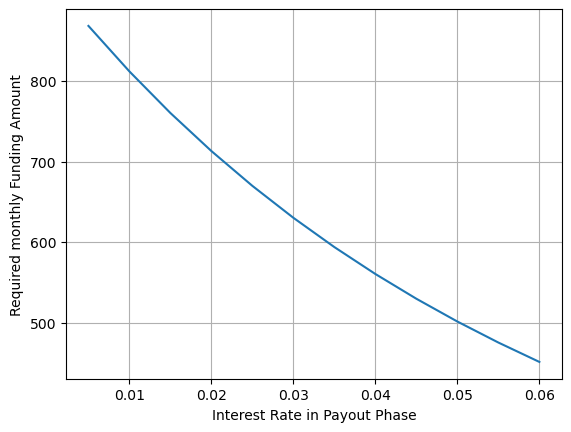

In [68]:
plt.plot(np.arange(0.005, 0.065, 0.005), np.abs(cf_1))
plt.grid()
plt.xlabel("Interest Rate in Payout Phase")
plt.ylabel("Required monthly Funding Amount")
plt.show()

### Amortizing Mortgage Loan - Debt Sizing

You consider to buy a new home for a Purchase Price of 400,000 USD. You have 150,000 USD in your savings account. Therefore, you require another 250,000 USD from a Bank (Amortizing Mortgage) to realize the Deal. Your local Bank quotes the following Mortgage terms:
- Initial Loan Amount shall not exceed 75% of Purchase Price.
- Fixed interest rate: 5.0% p.a. (compounded monthly)
- Initial Term with fixed interest rate is 30 years
- Outstanding Loan Amount after 30 Years shall not exceed 100,000 USD
- Loan payments (interest & amortization) shall be made monthly in arrears
- Monthly loan payments shall not exceed 1/3 of your current available monthly income of 4,800 USD 

Calculate the __effective annual interest rate__. <br>
__Maximize the Loan Amount__ (and minimize the funding required from your savings account)! <br>
Calculate __interest component__, __amortization component__ and __outstanding loan__ balance throughout the term and __visualize__! 

In [ ]:
#import numpy as np
#import numpy_financial as npf 

In [69]:
m = 12
pp = 400000
max_LTV = 0.75
r = 0.05
available_income = 4800
DSCR = 3/1
cf = -available_income / DSCR
n = 30
FV = -100000

In [70]:
er = (1 + r/m)**m - 1 
er

0.051161897881732976

In [71]:
cf

-1600.0

In [72]:
PV = npf.pv(rate = r/m, nper = n*m, pmt = cf, fv = FV)
PV

np.float64(320433.2468378557)

In [73]:
print("The Initial Loan Amount is {} USD!".format(min(PV, max_LTV * pp)))

The Initial Loan Amount is 300000.0 USD!


### Amortizing Mortgage Loan - Interest Payments and Amortization Schedule 

Calculate __interest component__, __amortization component__ and __outstanding loan__ balance throughout the term and __visualize__! 

In [3]:
import numpy as np
import numpy_financial as npf

In [4]:
m = 12
loan = 300000
r = 0.05
cf = -1600
n = 30

In [6]:
# loan obligation at end of 1 month
300000 * (1 + r/m)

301250.0

In [7]:
# loan obligation at end of 1 month plus payment
300000 * (1 + r/m) + cf

299650.0

In [ ]:
# interest portion of payment
300000 * r/m

1250.0

In [12]:
# principal portion of payment for 1st month
300000 * (r/m) + cf

-350.0

In [13]:
# loan obligation at end of 2nd month plus payment
(300000 * (1 + r/m) + cf) * (1 + r/m) + cf

299298.5416666667

In [14]:
# Final balance after 30 years
npf.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)

np.float64(-8709.477623486891)

In [15]:
final_balance = npf.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)
final_balance

np.float64(-8709.477623486891)

In [16]:
range(n*m + 1)

range(0, 361)

In [17]:
rem_loan = npf.fv(rate = r/m, nper = range(n*m + 1), pmt = cf, pv = loan)
rem_loan

array([-300000.        , -299650.        , -299298.54166667,
       -298945.61892361, -298591.22566913, -298235.35577608,
       -297878.00309181, -297519.16143803, -297158.82461069,
       -296796.9863799 , -296433.64048982, -296068.78065852,
       -295702.40057793, -295334.49391368, -294965.05430498,
       -294594.07536459, -294221.55067861, -293847.47380643,
       -293471.83828063, -293094.6376068 , -292715.86526349,
       -292335.51470209, -291953.57934668, -291570.05259396,
       -291184.9278131 , -290798.19834566, -290409.85750543,
       -290019.89857837, -289628.31482244, -289235.09946754,
       -288840.24571532, -288443.74673913, -288045.59568388,
       -287645.7856659 , -287244.30977284, -286841.16106356,
       -286436.33256799, -286029.81728702, -285621.60819238,
       -285211.69822652, -284800.08030246, -284386.74730372,
       -283971.69208416, -283554.90746784, -283136.38624896,
       -282716.12119166, -282294.10502996, -281870.33046758,
       -281444.79017786,

In [18]:
# Amotization of first payment
npf.ppmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)

np.float64(-350.0000000000002)

In [ ]:
# Amotization schedule
amort = npf.ppmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
amort

array([ -350.        ,  -351.45833333,  -352.92274306,  -354.39325448,
        -355.86989305,  -357.35268427,  -358.84165378,  -360.33682734,
        -361.83823079,  -363.34589008,  -364.85983129,  -366.38008059,
        -367.90666426,  -369.43960869,  -370.9789404 ,  -372.52468598,
        -374.07687217,  -375.63552581,  -377.20067383,  -378.77234331,
        -380.3505614 ,  -381.93535541,  -383.52675272,  -385.12478086,
        -386.72946745,  -388.34084023,  -389.95892706,  -391.58375592,
        -393.21535491,  -394.85375222,  -396.49897619,  -398.15105525,
        -399.81001798,  -401.47589306,  -403.14870928,  -404.82849557,
        -406.51528097,  -408.20909464,  -409.90996587,  -411.61792406,
        -413.33299874,  -415.05521957,  -416.78461632,  -418.52121888,
        -420.2650573 ,  -422.0161617 ,  -423.77456238,  -425.54028972,
        -427.31337426,  -429.09384665,  -430.88173768,  -432.67707825,
        -434.47989941,  -436.29023233,  -438.10810829,  -439.93355875,
      

In [20]:
# Interest portion of first payment
npf.ipmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)

array(-1250.)

In [21]:
# Interest schedule
interest = npf.ipmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
interest

array([-1250.        , -1248.54166667, -1247.07725694, -1245.60674552,
       -1244.13010695, -1242.64731573, -1241.15834622, -1239.66317266,
       -1238.16176921, -1236.65410992, -1235.14016871, -1233.61991941,
       -1232.09333574, -1230.56039131, -1229.0210596 , -1227.47531402,
       -1225.92312783, -1224.36447419, -1222.79932617, -1221.22765669,
       -1219.6494386 , -1218.06464459, -1216.47324728, -1214.87521914,
       -1213.27053255, -1211.65915977, -1210.04107294, -1208.41624408,
       -1206.78464509, -1205.14624778, -1203.50102381, -1201.84894475,
       -1200.18998202, -1198.52410694, -1196.85129072, -1195.17150443,
       -1193.48471903, -1191.79090536, -1190.09003413, -1188.38207594,
       -1186.66700126, -1184.94478043, -1183.21538368, -1181.47878112,
       -1179.7349427 , -1177.9838383 , -1176.22543762, -1174.45971028,
       -1172.68662574, -1170.90615335, -1169.11826232, -1167.32292175,
       -1165.52010059, -1163.70976767, -1161.89189171, -1160.06644125,
      

In [22]:
amort + interest

array([-1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
      

In [23]:
import matplotlib.pyplot as plt

[]

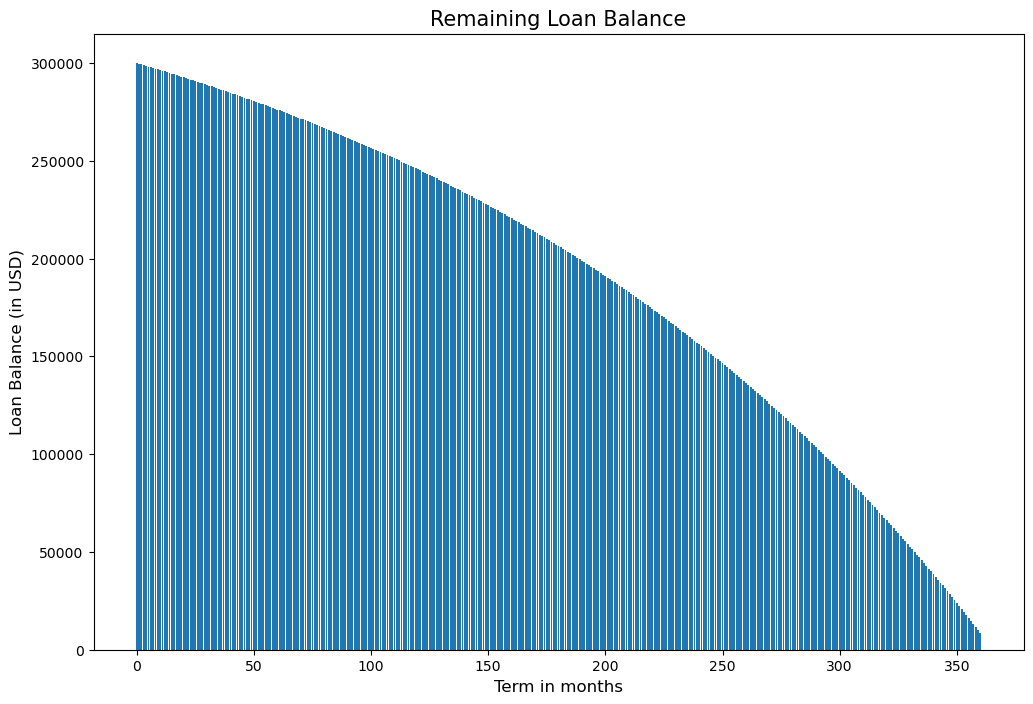

In [24]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n*m + 1), -rem_loan)
plt.title("Remaining Loan Balance", fontsize = 15)
plt.xlabel("Term in months", fontsize = 12)
plt.ylabel("Loan Balance (in USD)", fontsize = 12)
plt.plot()

[]

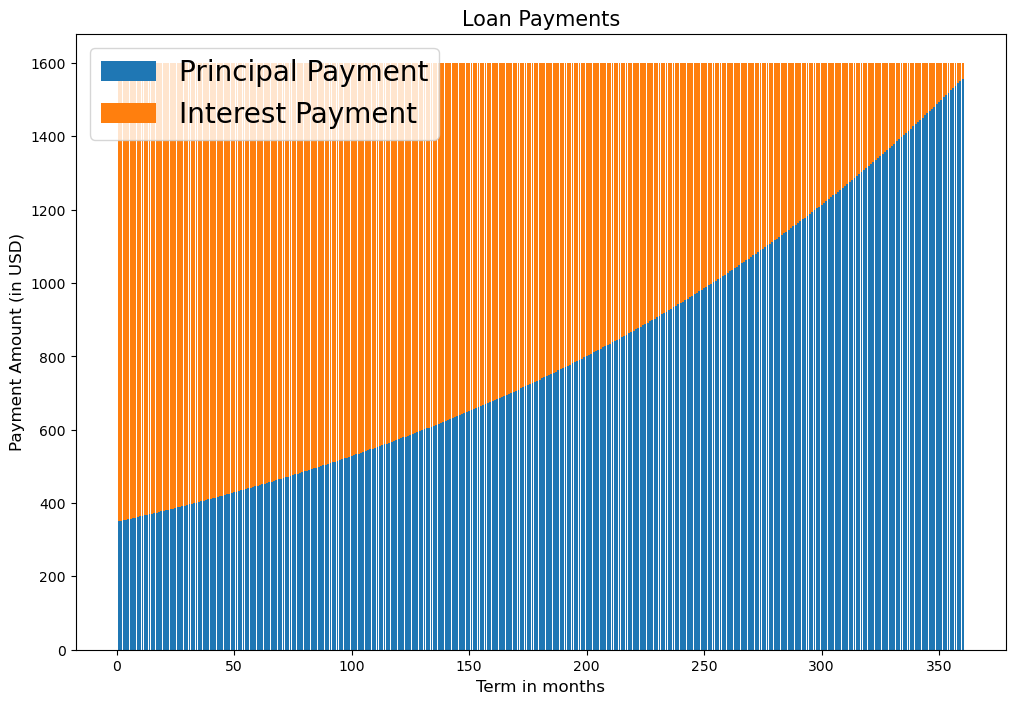

In [25]:
plt.figure(figsize = (12, 8))
plt.bar(range(1, n*m + 1), -amort, label = "Principal Payment")
plt.bar(range(1, n*m + 1), -interest, bottom = -amort, label = "Interest Payment")
plt.legend(fontsize = 20)
plt.title("Loan Payments", fontsize = 15)
plt.xlabel("Term in months", fontsize = 12)
plt.ylabel("Payment Amount (in USD)", fontsize = 12)
plt.plot()

###  Valuation of Bonds

You consider to purchase a Corporate Bond from XYZ Company that pays coupons of 5% p.a. (quarterly in arrears) for the next 6 years and a final repayment at maturity in 6 years. <br>
What price are you willing to pay (per 100 USD par value) if bonds with similar risk and maturity have a YTM of 4.5% p.a.?

In [ ]:
import numpy as np
import numpy_financial as npf 

In [26]:
m = 4
coup = 5 / m
r = 0.045
n = 6
FV = 100

In [27]:
PV = npf.pv(rate = r/m, nper = n*m, pmt = coup, fv = FV)
PV

np.float64(-102.6163208657496)

### Capital Budgeting - Mutually exclusive Projects (Part 1)

Company XYZ evaluates two mutually exclusive Investment Projects (A and B) that lead to the following (estimated) increases in company cashflows/profits (in MUSD):

- Project A: [20, 30, 40, 50, 100, 200]
- Project B: [50, 75, 100, 75, 50, 10]

Both projects require an initial Investment of 200 Million USD (to buy Machinery and Plant).

The projects are mutually exclusive. Which project should XYZ realize? Assume a company-wide required rate of return of 6.0% p.a. for comparable projects. 

Calculate the (hypothetical) required rate of return where your decision would change (crossover rate). Visualize!


## IRR and MPV leade to the same decissions
Accept the project when NPV is positive and IRR is grater than the required rate of return


In [28]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [29]:
cf_A =  [-200, 20, 30, 40, 50, 100, 200]

In [30]:
cf_B = [-200, 50, 75, 100, 75, 50, 10]

In [31]:
r = 0.06

In [32]:
x_axis = np.arange(7)
x_axis

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
cum_A = np.cumsum(cf_A)
cum_A

array([-200, -180, -150, -110,  -60,   40,  240])

In [34]:
cum_B = np.cumsum(cf_B)
cum_B

array([-200, -150,  -75,   25,  100,  150,  160])

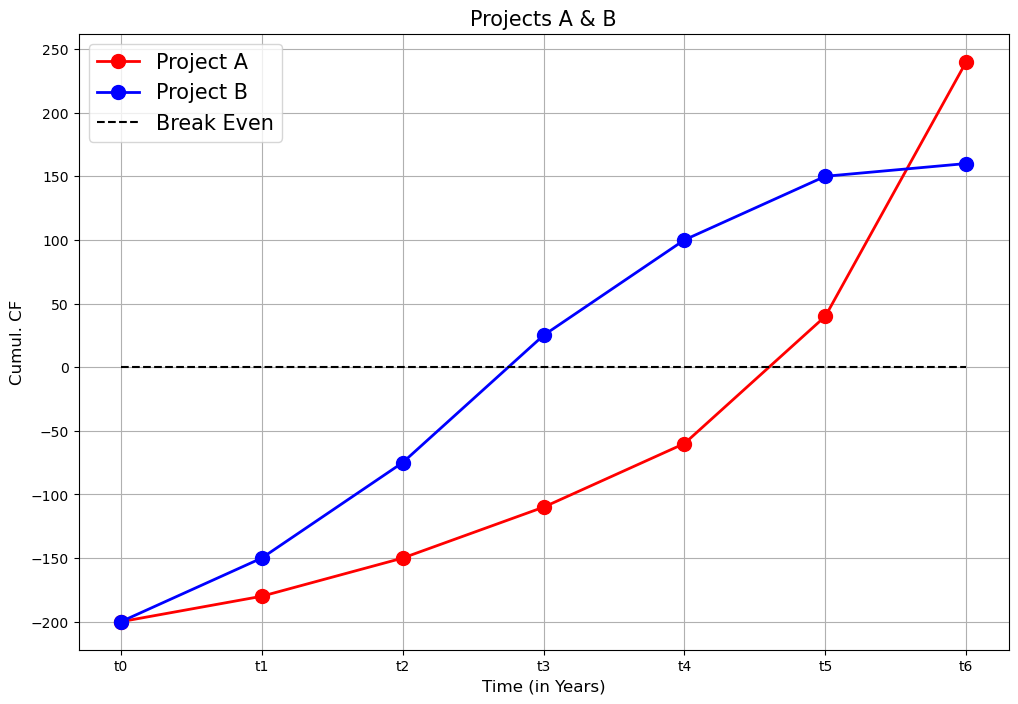

In [35]:
plt.figure(figsize = (12, 8))
plt.plot(x_axis, cum_A, color = "red", linewidth = 2, linestyle = "-", marker = "o", markersize = 10, label = "Project A")
plt.plot(x_axis, cum_B, color = "blue", linewidth = 2, linestyle = "-", marker = "o", markersize = 10, label = "Project B")
plt.grid()
plt.hlines(y = 0, xmin = x_axis[0], xmax = x_axis[-1], linestyles= "dashed", color = "black", label = "Break Even")
plt.title("Projects A & B", fontsize = 15)
plt.xlabel("Time (in Years)", fontsize = 12)
plt.ylabel("Cumul. CF", fontsize = 12)
plt.yticks(range(-200,251,50))
plt.xticks(x_axis, labels = ["t0", "t1", "t2", "t3", "t4", "t5", "t6"])
plt.legend(loc = "best", fontsize = 15)
plt.show()

### Capital Budgeting - Mutually exclusive Projects (Part 2) - Including Time Value of Money

In [36]:
irr_A = npf.irr(cf_A)
irr_A

0.18861794355562722

In [37]:
irr_B = npf.irr(cf_B)
irr_B

0.22406954854394856

In [38]:
npv_A = npf.npv(rate = 0.06, values = cf_A)
npv_A

np.float64(134.4751975864632)

In [39]:
npv_B = npf.npv(rate = 0.06, values = cf_B)
npv_B

np.float64(101.70101141560401)

IRR and NPV conflicting

In [ ]:
# 1000 interest rates from 0% to 25%
rs = np.linspace(start = 0, stop = 0.25, num = 1000)
rs

array([0.        , 0.00025025, 0.0005005 , 0.00075075, 0.001001  ,
       0.00125125, 0.0015015 , 0.00175175, 0.002002  , 0.00225225,
       0.0025025 , 0.00275275, 0.003003  , 0.00325325, 0.0035035 ,
       0.00375375, 0.004004  , 0.00425425, 0.0045045 , 0.00475475,
       0.00500501, 0.00525526, 0.00550551, 0.00575576, 0.00600601,
       0.00625626, 0.00650651, 0.00675676, 0.00700701, 0.00725726,
       0.00750751, 0.00775776, 0.00800801, 0.00825826, 0.00850851,
       0.00875876, 0.00900901, 0.00925926, 0.00950951, 0.00975976,
       0.01001001, 0.01026026, 0.01051051, 0.01076076, 0.01101101,
       0.01126126, 0.01151151, 0.01176176, 0.01201201, 0.01226226,
       0.01251251, 0.01276276, 0.01301301, 0.01326326, 0.01351351,
       0.01376376, 0.01401401, 0.01426426, 0.01451451, 0.01476476,
       0.01501502, 0.01526527, 0.01551552, 0.01576577, 0.01601602,
       0.01626627, 0.01651652, 0.01676677, 0.01701702, 0.01726727,
       0.01751752, 0.01776777, 0.01801802, 0.01826827, 0.01851

In [41]:
list_A = []
for i in rs:
    list_A.append(npf.npv(i, cf_A))
list_A

[np.float64(240.0),
 np.float64(239.47488441507772),
 np.float64(238.95058769494227),
 np.float64(238.42710831741024),
 np.float64(237.90444476354853),
 np.float64(237.38259551767064),
 np.float64(236.86155906732526),
 np.float64(236.34133390329015),
 np.float64(235.82191851956568),
 np.float64(235.30331141336373),
 np.float64(234.78551108510376),
 np.float64(234.26851603840205),
 np.float64(233.7523247800651),
 np.float64(233.2369358200836),
 np.float64(232.72234767162152),
 np.float64(232.208558851012),
 np.float64(231.69556787774678),
 np.float64(231.18337327446986),
 np.float64(230.67197356697153),
 np.float64(230.16136728417726),
 np.float64(229.65155295814412),
 np.float64(229.1425291240501),
 np.float64(228.63429432018788),
 np.float64(228.12684708795868),
 np.float64(227.6201859718619),
 np.float64(227.1143095194913),
 np.float64(226.60921628152397),
 np.float64(226.10490481171493),
 np.float64(225.60137366689094),
 np.float64(225.09862140693963),
 np.float64(224.59664659480643

In [42]:
list_B = []
for i in rs:
    list_B.append(npf.npv(i, cf_B))
list_B

[np.float64(160.0),
 np.float64(159.7223840275018),
 np.float64(159.44509134253056),
 np.float64(159.16812146119483),
 np.float64(158.8914739004748),
 np.float64(158.61514817822237),
 np.float64(158.33914381315776),
 np.float64(158.06346032486834),
 np.float64(157.78809723380775),
 np.float64(157.5130540612918),
 np.float64(157.23833032949935),
 np.float64(156.96392556146836),
 np.float64(156.68983928109486),
 np.float64(156.41607101313213),
 np.float64(156.14262028318674),
 np.float64(155.86948661771922),
 np.float64(155.5966695440403),
 np.float64(155.32416859031),
 np.float64(155.05198328553624),
 np.float64(154.78011315957193),
 np.float64(154.5085577431146),
 np.float64(154.23731656770346),
 np.float64(153.96638916571786),
 np.float64(153.69577507037658),
 np.float64(153.4254738157344),
 np.float64(153.1554849366821),
 np.float64(152.8858079689431),
 np.float64(152.6164424490727),
 np.float64(152.3473879144566),
 np.float64(152.07864390330792),
 np.float64(151.81020995466704),
 np

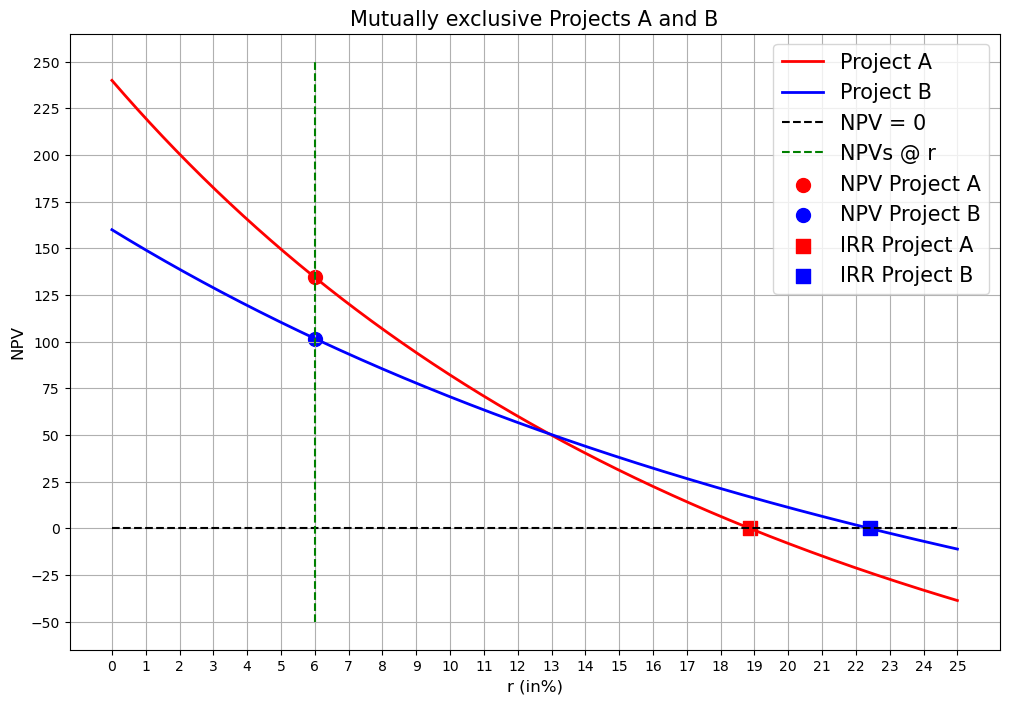

In [43]:
plt.figure(figsize = (12, 8))
plt.plot(rs, list_A, color = "red", linewidth = 2, linestyle = "-", label = "Project A")
plt.plot(rs, list_B, color = "blue", linewidth = 2, linestyle = "-", label = "Project B")
plt.grid()
plt.hlines(y = 0, xmin = rs[0], xmax = rs[-1], linestyles= "dashed", color = "black", label = "NPV = 0")
plt.vlines(x = r, ymin = -50, ymax = 250, linestyles= "dashed", color = "green", label = "NPVs @ r")
plt.scatter(r, npv_A, s = 100, c = "red", marker = "o", label = "NPV Project A")
plt.scatter(r, npv_B, s = 100, c = "blue", marker = "o", label = "NPV Project B")
plt.scatter(irr_A, 0, s = 100, c = "red", marker = "s", label = "IRR Project A")
plt.scatter(irr_B, 0, s = 100, c = "blue", marker = "s", label = "IRR Project B")
#plt.scatter(cr, npvB, s = 400, c = "m", marker = "*", label = "Crossover Rate")
plt.xticks(np.arange(26)/100, labels = np.arange(26))
plt.yticks(np.arange(-50, 251, 25))
plt.title("Mutually exclusive Projects A and B", fontsize = 15)
plt.xlabel("r (in%)", fontsize = 12)
plt.ylabel("NPV", fontsize = 12)
plt.legend(loc = "best", fontsize = 15)
plt.show()

NPV is the best method to rank mutually exclusive projects because it directly measures the expected increase in company value. Realise the project with higher NPV to have a larger increase in company value. In contrast, is a hypothedical rate of return that inplicitly assumes that we can re-invest positive cashflows at the IRR which is not the case when the company's typical rate of return is only 6%

From the graph, given the Required rate of retrun is between 0 and around 13%, then it's more beneficial to select prject A with a higher NPV. However, if the required rate of return is in the range of 13% to 22.5%, project B should be slected. 

### Capital Budgeting - Mutually exclusive Projects (Part 3)

In [44]:
cr = 0.00
step = 0.000001
tolerance = 0.001 

while True:
    npvA = npf.npv(cr, cf_A)
    npvB = npf.npv(cr, cf_B)
    
    diff = npvA - npvB
    
    if abs(diff) > tolerance:
        cr += step
 
    else:
        break
        
print(npvA, npvB, cr)

50.782160361595935 50.78147256507692 0.12913200000010847


In [45]:
diff_cf = np.array(cf_A) - np.array(cf_B)
diff_cf

array([  0, -30, -45, -60, -25,  50, 190])

In [46]:
cr = npf.irr(diff_cf)
cr

0.12913392906856336